In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Gold + Silver Pair

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


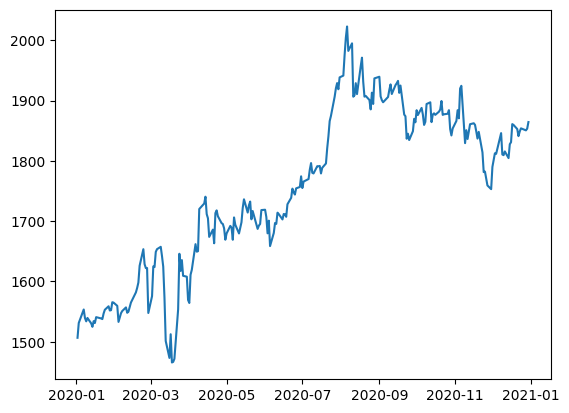

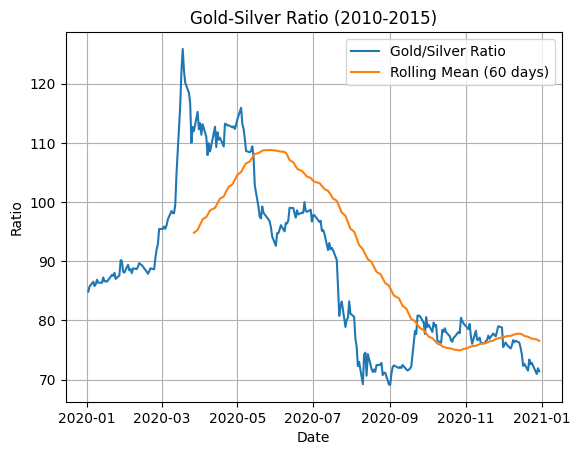

In [10]:
from scipy.optimize import minimize_scalar

# Training data: 2010-01-01 to 2015-12-31
historical_gold = yf.download('GC=F', start='2020-01-01', end='2020-12-31', auto_adjust=False)
historical_silver = yf.download('SI=F', start='2020-01-01', end='2020-12-31', auto_adjust=False)

#plt.plot(gold.index, gold['Close'], label='Gold')
#plt.plot(silver.index, silver['Close'], label='Silver')

historical_spread = historical_gold[('Close', 'GC=F')] - historical_silver[('Close', 'SI=F')]
plt.plot(historical_spread.index, historical_spread, label='Gold-Silver Spread')
plt.show()

historical_ratio = historical_gold[('Close', 'GC=F')] / historical_silver[('Close', 'SI=F')]
plt.plot(historical_ratio.index, historical_ratio, label='Gold/Silver Ratio')

rolling_window = 60 # You can change this value as needed

rolling_mean = historical_ratio.rolling(window=rolling_window).mean() 

plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({rolling_window} days)')
plt.legend()
plt.title('Gold-Silver Ratio (2010-2015)')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.grid(True) 

- Maybe try to find better pairs that are more correlated 
- Test cointegration; stationary; bound range

In [ ]:
from statsmodels.tsa.stattools import adfuller, coint

# ADF test on historical_ratio
adf_result = adfuller(historical_ratio.dropna())
adf_pvalue = adf_result[1]
print(f"ADF test p-value for Gold/Silver ratio: {adf_pvalue:.4f}")

# Engle-Granger cointegration test between gold and silver prices
gold_close = historical_gold[('Close', 'GC=F')]
silver_close = historical_silver[('Close', 'SI=F')]
coint_result = coint(gold_close, silver_close)
coint_pvalue = coint_result[1]
print(f"Engle-Granger cointegration test p-value: {coint_pvalue:.4f}")

# Conclusion: gold-silver ratio is not stationary and not cointegrated based on p-values > 0.05 --> cannot pair trade

ADF test p-value for Gold/Silver ratio: 0.7702
Engle-Granger cointegration test p-value: 0.4002


##### Alternative Equity Pairs

In [137]:
available_stocks = ['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APP', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COIN', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'D', 'DAL', 'DASH', 'DAY', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EG', 'EIX', 'EL', 'ELV', 'EME', 'EMN', 'EMR', 'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ERIE', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXE', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FIS', 'FITB', 'FOX', 'FOXA', 'FRT', 'FSLR', 'FTNT', 'FTV', 'GD', 'GDDY', 'GE', 'GEHC', 'GEN', 'GEV', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HOOD', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUBB', 'HUM', 'HWM', 'IBKR', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JBL', 'JCI', 'JKHY', 'JNJ', 'JPM', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KKR', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KVUE', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LII', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNT', 'LOW', 'LRCX', 'LULU', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PANW', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PLTR', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSKY', 'PSX', 'PTC', 'PWR', 'PYPL', 'QCOM', 'RCL', 'REG', 'REGN', 'RF', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBAC', 'SBUX', 'SCHW', 'SHW', 'SJM', 'SLB', 'SMCI', 'SNA', 'SNPS', 'SO', 'SOLV', 'SPG', 'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SW', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TGT', 'TJX', 'TKO', 'TMO', 'TMUS', 'TPL', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTD', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UBER', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VICI', 'VLO', 'VLTO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VST', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBD', 'WDAY', 'WDC', 'WEC', 'WELL', 'WFC', 'WM', 'WMB', 'WMT', 'WRB', 'WSM', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'XYZ', 'YUM', 'ZBH', 'ZBRA', 'ZTS', 'SPY', 'QQQ', 'IWM', 'DIA', 'VOO', 'VTI', 'XLE', 'XLF', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLI', 'XLB', 'XLRE', 'EFA', 'EEM', 'VEA', 'AGG', 'LQD', 'HYG', 'TLT', 'IEF', 'BND', 'EMB', 'GLD', 'SLV', 'VNQ']
start_date, end_date = '2018-01-01', '2022-12-31'
# ignore crypto for now

In [128]:
### ONLY RUN ONCE

stock_price_list = []
for i in available_stocks:
    stock = yf.download(i, start=start_date, end=end_date, auto_adjust=False, progress=False)
    stock_price_list.append(stock['Close']) # choose Close price daily 
    update_number = len(stock_price_list)
    if update_number % 50 == 0:
        print(f"Downloaded {update_number} stocks...")

    

Downloaded 50 stocks...



1 Failed download:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-01 -> 2024-12-31)')

1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Downloaded 100 stocks...
Downloaded 150 stocks...
Downloaded 200 stocks...
Downloaded 250 stocks...
Downloaded 300 stocks...
Downloaded 350 stocks...
Downloaded 400 stocks...
Downloaded 450 stocks...
Downloaded 500 stocks...


In [133]:
from statsmodels.tsa.stattools import coint

# Find most correlated pairs

all_stock = pd.concat(stock_price_list, axis=1)
correlation_matrix = all_stock.corr()

# sns.heatmap(correlation_matrix, cmap='coolwarm') 

# Find top 10 most correlated pairs (excluding self-correlation)
corr_unstacked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).unstack()
top_pairs = corr_unstacked.sort_values(ascending=False).drop_duplicates().head(50)

cointegrated_pairs = []
for (stock1, stock2), corr in top_pairs.items():
    s1 = all_stock[stock1].dropna()
    s2 = all_stock[stock2].dropna()
    common_idx = s1.index.intersection(s2.index)
    if len(common_idx) > 0:
        s1_aligned = s1.loc[common_idx]
        s2_aligned = s2.loc[common_idx]
        _, pvalue, _ = coint(s1_aligned, s2_aligned)
        if pvalue < 0.05:
            cointegrated_pairs.append(((stock1, stock2), corr, pvalue))

print("Cointegrated pairs (p-value < 0.05):")
for pair, corr, pvalue in cointegrated_pairs:
    print(f"{pair}: corr={corr:.4f}, p-value={pvalue:.4f}")

print("Most correlated pairs:")
print(top_pairs)

Cointegrated pairs (p-value < 0.05):
('VOO', 'SPY'): corr=1.0000, p-value=0.0000
('GOOGL', 'GOOG'): corr=0.9999, p-value=0.0015
('CDNS', 'SNPS'): corr=0.9957, p-value=0.0338
('LEN', 'DHI'): corr=0.9949, p-value=0.0002
('VMC', 'MLM'): corr=0.9930, p-value=0.0079
('V', 'MA'): corr=0.9930, p-value=0.0000
('SPY', 'DIA'): corr=0.9905, p-value=0.0060
('DIA', 'VOO'): corr=0.9904, p-value=0.0038
('URI', 'PH'): corr=0.9903, p-value=0.0042
('VTI', 'DIA'): corr=0.9901, p-value=0.0215
('ETN', 'IR'): corr=0.9892, p-value=0.0030
('ETN', 'PH'): corr=0.9888, p-value=0.0176
('BRO', 'COST'): corr=0.9887, p-value=0.0000
('AJG', 'ORLY'): corr=0.9885, p-value=0.0067
('XLI', 'DIA'): corr=0.9875, p-value=0.0410
('URI', 'IR'): corr=0.9867, p-value=0.0009
('ETN', 'URI'): corr=0.9866, p-value=0.0071
('COR', 'MCK'): corr=0.9864, p-value=0.0391
('AVGO', 'ANET'): corr=0.9863, p-value=0.0105
('HUBB', 'GWW'): corr=0.9862, p-value=0.0004
('URI', 'CAT'): corr=0.9861, p-value=0.0004
('APH', 'ETN'): corr=0.9859, p-value

To start, we use fixed equity pairs --> then we expand the number of pairs --> then we use dynamic pairs 

Optimal k for PNC and BAC: 4.6228


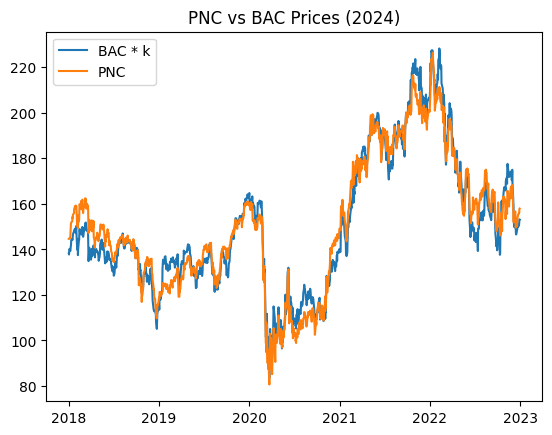

Number of spread crossings (above to below and below to above): 88


In [138]:
from scipy.optimize import minimize_scalar

stock_1_name = 'PNC'
stock_2_name = 'BAC'

stock_1_train = yf.download(stock_1_name, start=start_date, end=end_date, auto_adjust=False, progress = False)['Close']
stock_2_train = yf.download(stock_2_name, start=start_date, end=end_date, auto_adjust=False, progress = False)['Close']

def bnd_agg_constant(k):
    common_idx = stock_1_train.index.intersection(stock_2_train.index)
    s1 = stock_1_train.loc[common_idx]
    s2 = stock_2_train.loc[common_idx]
    return np.sum((s1.values - k * s2.values) ** 2)

result = minimize_scalar(bnd_agg_constant)
k_bnd_agg = result.x
print(f"Optimal k for {stock_1_name} and {stock_2_name}: {k_bnd_agg:.4f}")

common_idx = stock_1_train.index.intersection(stock_2_train.index)
plt.plot(common_idx, stock_2_train.loc[common_idx].values * k_bnd_agg, label=f'{stock_2_name} * k')
plt.plot(common_idx, stock_1_train.loc[common_idx].values, label=stock_1_name)
plt.legend()
plt.title(f'{stock_1_name} vs {stock_2_name} Prices (2024)')
plt.show()

# Find the number of days where the spread crosses zero (from above to below and vice versa)
spread = stock_1_train.loc[common_idx].values - stock_2_train.loc[common_idx].values * k_bnd_agg

cross_above_to_below = np.sum((spread[:-2] > 0) & (spread[1:-1] < 0))
cross_below_to_above = np.sum((spread[:-2] < 0) & (spread[1:-1] > 0))
num_crossings = cross_above_to_below + cross_below_to_above
print(f"Number of spread crossings (above to below and below to above): {num_crossings}")



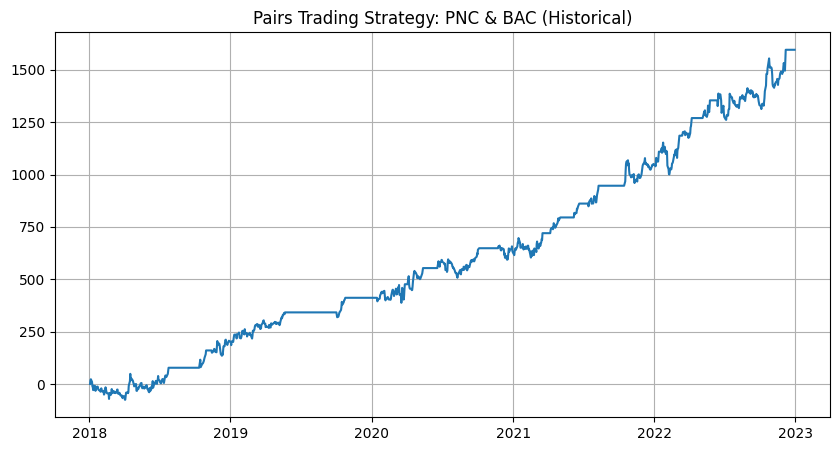

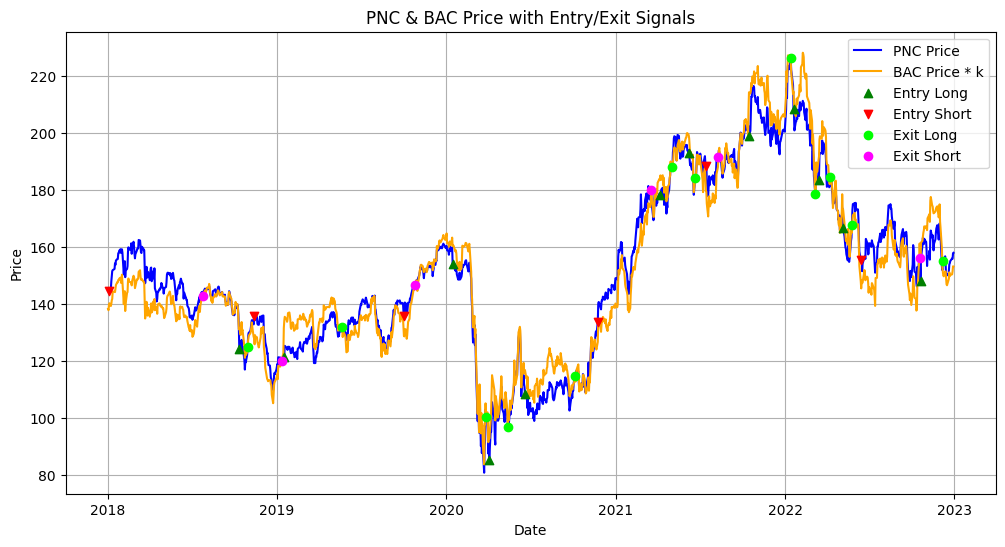

In [139]:
# Compute spread
spread = stock_1_train.loc[common_idx, 'PNC'].values - k_bnd_agg * stock_2_train.loc[common_idx, 'BAC'].values

# Z-score
spread_mean = np.mean(spread)
spread_std = np.std(spread)
zscore = (spread - spread_mean) / spread_std

positions = np.zeros_like(zscore)
spread_set = 1.0

for i in range(1, len(spread)):

    # ----- ENTRY LOGIC -----
    # Enter LONG: zscore crosses BELOW -1
    if zscore[i-1] > -spread_set and zscore[i] <= -spread_set:
        positions[i] = 10
    
    # Enter SHORT: zscore crosses ABOVE +1
    elif zscore[i-1] < spread_set and zscore[i] >= spread_set:
        positions[i] = -10

    # ----- EXIT LOGIC -----
    elif positions[i-1] == 10 and zscore[i] > 0:
        positions[i] = 0

    elif positions[i-1] == -10 and zscore[i] < 0:
        positions[i] = 0

    # ----- HOLD -----
    else:
        positions[i] = positions[i-1]


# Compute spread returns
returns = np.diff(spread)

# Align positions: position at t-1 impacts return at t
strategy_returns = returns * positions[:-1]

# Cumulative PnL
cum_returns = np.cumsum(strategy_returns)

plt.figure(figsize=(10,5))
plt.plot(common_idx[1:], cum_returns)
plt.title("Pairs Trading Strategy: PNC & BAC (Historical)")
plt.grid(True)
plt.show()


# Plot entry/exit signals on price curves for PNC and BAC
plt.figure(figsize=(12,6))
plt.plot(common_idx, stock_1_train.loc[common_idx, 'PNC'].values, label='PNC Price', color='blue')
plt.plot(common_idx, stock_2_train.loc[common_idx, 'BAC'].values * k_bnd_agg, label='BAC Price * k', color='orange')

# Mark entry/exit signals
entry_long = np.where((positions == 10) & (np.roll(positions, 1) != 10))[0]
entry_short = np.where((positions == -10) & (np.roll(positions, 1) != -10))[0]
exit_long = np.where((positions == 0) & (np.roll(positions, 1) == 10))[0]
exit_short = np.where((positions == 0) & (np.roll(positions, 1) == -10))[0]

plt.scatter(common_idx[entry_long], stock_1_train.loc[common_idx, 'PNC'].values[entry_long], marker='^', color='green', label='Entry Long', zorder=5)
plt.scatter(common_idx[entry_short], stock_1_train.loc[common_idx, 'PNC'].values[entry_short], marker='v', color='red', label='Entry Short', zorder=5)
plt.scatter(common_idx[exit_long], stock_1_train.loc[common_idx, 'PNC'].values[exit_long], marker='o', color='lime', label='Exit Long', zorder=5)
plt.scatter(common_idx[exit_short], stock_1_train.loc[common_idx, 'PNC'].values[exit_short], marker='o', color='magenta', label='Exit Short', zorder=5)

plt.title("PNC & BAC Price with Entry/Exit Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



Backtesting

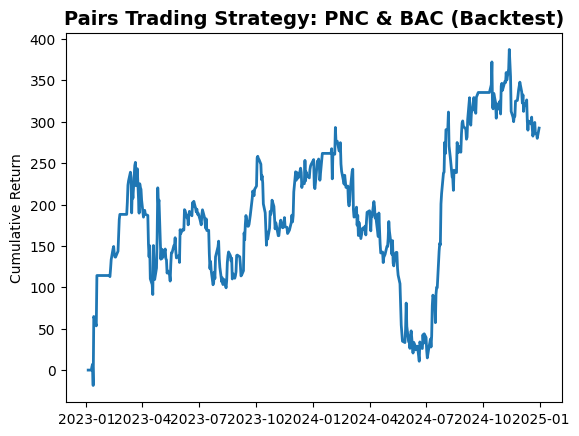

'\n# Subplot 2: Z-score and positions\nplt.subplot(3, 1, 2)\nzscores = (spread_backtest - spread_mean_init) / spread_std_init\nplt.plot(common_idx_backtest, zscores, label=\'Z-score\', alpha=0.7)\nplt.axhline(y=spread_set, color=\'r\', linestyle=\'--\', label=\'Entry/Exit Thresholds\')\nplt.axhline(y=-spread_set, color=\'r\', linestyle=\'--\')\nplt.axhline(y=0, color=\'k\', linestyle=\'-\', alpha=0.3)\nplt.ylabel(\'Z-score\')\nplt.legend()\nplt.grid(True, alpha=0.3)\n\n# Subplot 3: Positions\nplt.subplot(3, 1, 3)\nplt.plot(common_idx_backtest, positions_backtest, label=\'Position\', drawstyle=\'steps-post\')\nplt.ylabel(\'Position\')\nplt.xlabel(\'Date\')\nplt.legend()\nplt.grid(True, alpha=0.3)\n\nplt.tight_layout()\nplt.show()\n\n# Print performance metrics\nprint(f"\n{\'=\'*50}")\nprint(f"BACKTEST PERFORMANCE METRICS")\nprint(f"{\'=\'*50}")\nprint(f"Total Return: ${total_return:.2f}")\nprint(f"Sharpe Ratio: {sharpe_ratio:.2f}")\nprint(f"Max Drawdown: ${max_drawdown:.2f}")\nprint(f"N

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Download backtest data
start_date_backtest = '2023-01-01'
end_date_backtest = '2024-12-31'
stock_1_backtest = yf.download(stock_1_name, start=start_date_backtest, end=end_date_backtest, auto_adjust=False, progress=False)['Close']
stock_2_backtest = yf.download(stock_2_name, start=start_date_backtest, end=end_date_backtest, auto_adjust=False, progress=False)['Close']

# Align indices
common_idx_backtest = stock_1_backtest.index.intersection(stock_2_backtest.index)

# Calculate spreads
spread_historical = stock_1_train.loc[common_idx, 'PNC'].values - k_bnd_agg * stock_2_train.loc[common_idx, 'BAC'].values
spread_backtest = stock_1_backtest.loc[common_idx_backtest, 'PNC'].values - k_bnd_agg * stock_2_backtest.loc[common_idx_backtest, 'BAC'].values

# Initial statistics from historical data
spread_mean_init = np.mean(spread_historical)
spread_std_init = np.std(spread_historical)

# Initialize positions array - IN REALITY, NEED TO INCREASE INCREMENTALLY
positions_backtest = np.zeros(len(spread_backtest))
#returns_backtest = np.zeros(len(spread_backtest))
spread_set = 1.0

# Rolling window parameters
window_size = len(spread_historical)
spread_window = spread_historical.tolist()

# Backtesting loop
for i in range(len(spread_backtest)):
    # Update rolling window (remove oldest, add newest)
    if i > 0:
        spread_window.pop(0)
        spread_window.append(spread_backtest[i])
    
    # Calculate current statistics (can use rolling or keep initial)
    # Option 1: Use initial statistics (stationary assumption)
    spread_mean = spread_mean_init
    spread_std = spread_std_init
    
    # Option 2: Use rolling statistics (uncomment below)
    # spread_mean = np.mean(spread_window)
    # spread_std = np.std(spread_window)
    
    # Calculate z-score
    zscore = (spread_backtest[i] - spread_mean) / spread_std
    
    # Trading logic
    if i == 0:
        # First position based on initial z-score
        if zscore < -spread_set:
            positions_backtest[i] = 10  # Long spread (buy stock1, sell stock2)
        elif zscore > spread_set:
            positions_backtest[i] = -10  # Short spread (sell stock1, buy stock2)
        else:
            positions_backtest[i] = 0  # No position
    else:
        # Entry conditions
        if zscore < -spread_set and positions_backtest[i-1] == 0:
            positions_backtest[i] = 10  # Enter long spread
        elif zscore > spread_set and positions_backtest[i-1] == 0:
            positions_backtest[i] = -10  # Enter short spread
        # Exit conditions
        elif positions_backtest[i-1] == 10 and zscore > 0:
            positions_backtest[i] = 0  # Exit long position
        elif positions_backtest[i-1] == -10 and zscore < 0:
            positions_backtest[i] = 0  # Exit short position
        else:
            positions_backtest[i] = positions_backtest[i-1]  # Hold current position
    

# Calculate returns
spread_returns = np.diff(spread_backtest)
strategy_returns_backtest = spread_returns * positions_backtest[:-1]

# Cumulative returns
cum_returns_backtest = np.cumsum(strategy_returns_backtest)

'''
# Performance metrics
total_return = cum_returns_backtest[-1]
sharpe_ratio = np.mean(strategy_returns_backtest) / np.std(strategy_returns_backtest) * np.sqrt(252) if np.std(strategy_returns_backtest) > 0 else 0
max_drawdown = np.min(cum_returns_backtest - np.maximum.accumulate(cum_returns_backtest))
''' 


plt.plot(common_idx_backtest[1:], cum_returns_backtest, label='Strategy Cumulative Return', linewidth=2)
plt.title(f'Pairs Trading Strategy: {stock_1_name} & {stock_2_name} (Backtest)', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Return')
plt.show()

'''
# Subplot 2: Z-score and positions
plt.subplot(3, 1, 2)
zscores = (spread_backtest - spread_mean_init) / spread_std_init
plt.plot(common_idx_backtest, zscores, label='Z-score', alpha=0.7)
plt.axhline(y=spread_set, color='r', linestyle='--', label='Entry/Exit Thresholds')
plt.axhline(y=-spread_set, color='r', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.ylabel('Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Positions
plt.subplot(3, 1, 3)
plt.plot(common_idx_backtest, positions_backtest, label='Position', drawstyle='steps-post')
plt.ylabel('Position')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print(f"\n{'='*50}")
print(f"BACKTEST PERFORMANCE METRICS")
print(f"{'='*50}")
print(f"Total Return: ${total_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: ${max_drawdown:.2f}")
print(f"Number of Trades: {np.sum(np.abs(np.diff(positions_backtest)))}")
print(f"{'='*50}")
'''

In [ ]:
start_date_backtest = '2024-01-01'
end_date_backtest = '2024-12-31'

stock_1_backtest = yf.download(stock_1_name, start=start_date_backtest, end=end_date_backtest, auto_adjust=False, progress = False)['Close']
stock_2_backtest = yf.download(stock_2_name, start=start_date_backtest, end=end_date_backtest, auto_adjust=False, progress = False)['Close']

common_idx_backtest = stock_1_backtest.index.intersection(stock_2_backtest.index)

spread_historical = stock_1_train.loc[common_idx, 'PNC'].values - k_bnd_agg * stock_2_train.loc[common_idx, 'BAC'].values
spread_backtest = stock_1_backtest.loc[common_idx_backtest, 'PNC'].values - k_bnd_agg * stock_2_backtest.loc[common_idx_backtest, 'BAC'].values
spread_mean_init = np.mean(spread_historical)
spread_std_init = np.std(spread_historical)

spread = spread_historical.tolist()

# keep the number in the spread calculation (mean/std) constant
N = len(spread_historical)
positions_backtest = []
spread_set = 1.0

# TO DO: make the code below more efficient

# this loop will work as long as len(spread_historical) >= len(spread_backtest) - i.e. more historical than backtest data
for i in range(1, N):
    N = len(spread)
    # Remove the first element and append the ith element from spread_backtest
    spread.pop(0)
    spread.append(spread_backtest[i])
    spread_mean = np.mean(spread)
    spread_std = np.std(spread)
    zscore = (spread[-1] - spread_mean_init) / spread_std_init

    if zscore < - spread_set and zscore >= - spread_set:
        positions_backtest[i] = 10  # Enter long spread
    elif zscore > spread_set and zscore <= spread_set:
        positions_backtest[i] = -10 # Enter short spread
    elif (positions_backtest[i-1] == 10 and zscore > 0) or (positions_backtest[i-1] == -10 and zscore < 0):
        positions_backtest[i] = 0  # Exit position
        positions_backtest[i] = 0  # Exit position
    else:
        positions_backtest[i] = positions_backtest[i-1]  # Hold


# Calculate daily returns of the spread
returns = np.diff(spread)
strategy_returns_backtest = returns * positions_backtest[1:]

# Cumulative returns
cum_returns = np.cumsum(strategy_returns_backtest)

plt.figure(figsize=(10,5))
plt.plot(common_idx[1:], cum_returns, label='Pairs Trading Cumulative Return - Backtest')
plt.title('Pairs Trading Strategy: CINF & NDAQ (Backtest))')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


Note: Best = tradeoff between volatility and stationarity 
- Create an indicator that is a function of how much two stocks are above and below (should be ~50%) and their ADF/E-G p-values
- The same k doesn't work for all time periods - need to dynamically change

TO DO
- Continue explore and identify the best stock pair(s) to trade
- Determine the stationary/cointegration of all pairs of stocks - and the best one to trade
- Create backtesting pipeline - allow dynamic choice of stocks?
